<a href="https://colab.research.google.com/github/iPakTulane/GrokkingML/blob/main/C3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 3: Linear Regression for a housing dataset

##Importing the necessary packages


In [5]:
from matplotlib import pyplot as plt
import numpy as np
import random

##Defining and plotting our dataset

In [6]:
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356,407,448])
print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


In [20]:
import numpy as np
import matplotlib
from matplotlib import pyplot

def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    pyplot.scatter(X, y)
    pyplot.xlabel('number of rooms')
    pyplot.ylabel('prices')

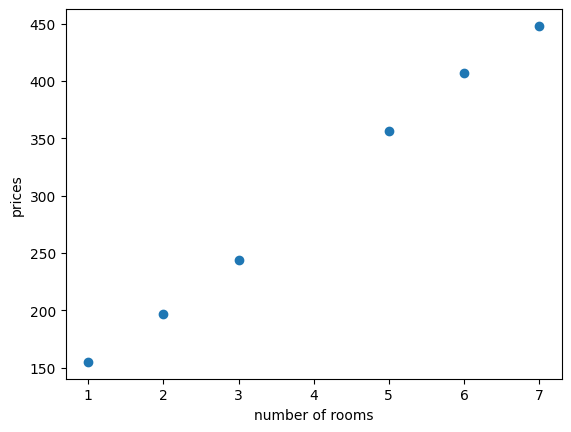

In [8]:
plot_points(features, labels)

##Coding the tricks
- Simple trick
- Absolute trick
- Square trick

##Simple trick

In [9]:
def simple_trick(base_price, price_per_room, num_rooms, price):
  small_random_1 = random.random()*0.1
  small_random_2 = random.random()*0.1

  predicted_price = base_price + price_per_room*num_rooms
  if price > predicted_price and num_rooms > 0:
    price_per_room += small_random_1
    base_price += small_random_2
  if price > predicted_price and num_rooms < 0:
    price_per_room -= small_random_1
    base_price += small_random_2
  if price < predicted_price and num_rooms > 0:
    price_per_room -= small_random_1
    base_price -= small_random_2
  if price < predicted_price and num_rooms < 0:
    price_per_room -= small_random_1
    base_price += small_random_2
  return price_per_room, base_price

Price per room: 0.8444218515250481
Base price: 0.7579544029403025


(0.8444218515250481, 0.7579544029403025)

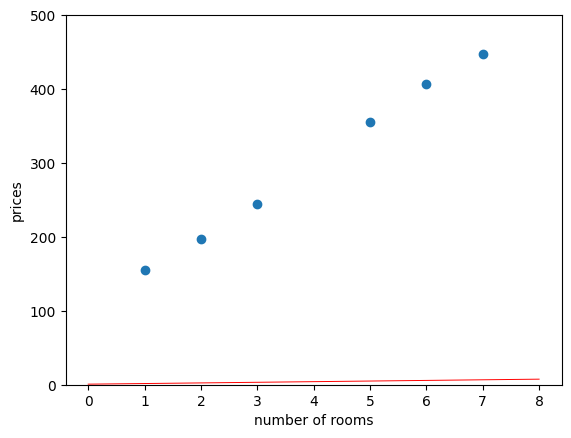

In [10]:
import random

random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs=10000):
  price_per_room = random.random()
  base_price = random.random()
  for epoch in range(epochs):
    # if epoch == 1:
    # if epoch <= 10:
    # if epoch <= 50:
    if epoch > 50:
      draw_line(price_per_room, base_price, starting=0, ending=8)
      i = random.randint(0, len(features)-1)
      num_rooms = features[i]
      price = labels[i]
      price_per_room, base_price = simple_trick(base_price,
                                                price_per_room,
                                                num_rooms,
                                                price,
                                                learning_rate=learning_rate)

    draw_line(price_per_room, base_price, 'red', starting=0, ending=8)
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

plt.ylim(0,500)

linear_regression(features, labels, learning_rate=0.01, epochs=1000)

##Absolute trick

In [11]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

Price per room: 39.810571580831024
Base price: 10.258916750292789


(39.810571580831024, 10.258916750292789)

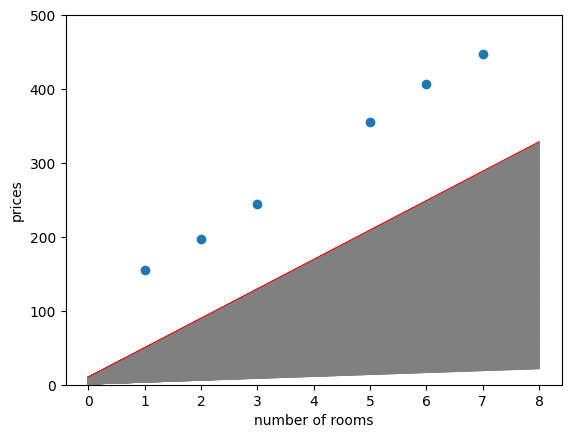

In [12]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 10000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        # Uncomment any of the following lines to plot different epochs
        # if epoch == 1:
        # if epoch <= 10:
        # if epoch <= 50:
        if epoch > 50:
        # if True:
            draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment any of the 2 following lines to use a different trick
        price_per_room, base_price = absolute_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'red', starting=0, ending=8)
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

##Square trick

In [13]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

Price per room: 52.57856014552871
Base price: 89.6007475312602


(52.57856014552871, 89.6007475312602)

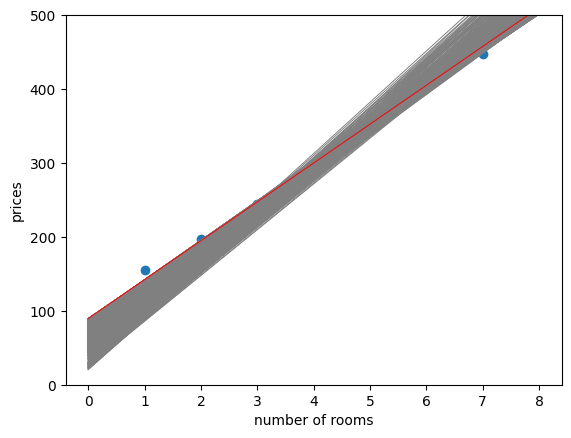

In [21]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 10000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        # Uncomment any of the following lines to plot different epochs
        #if epoch == 1:
        #if epoch <= 10:
        #if epoch <= 50:
        if epoch > 50:
        # if True:
            draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment any of the 2 following lines to use a different trick
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'red', starting=0, ending=8)
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)